In [30]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt


In [31]:
input_shape =(28,28,1)

In [32]:
def plotData(history, metric):
    train_metrics = history.history[metric]
    validation_metrics = history.history["val_"+metric]

    epochs = range(1, len(train_metrics)+1)

    plt.plot(epochs, train_metrics)
    plt.plot(epochs, validation_metrics)

    plt.title("Training&Validation"+metric)

    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric,"val_"+metric])

    plt.show()

In [54]:
def plotLR(history):
    learning_rate = history.history["lr"]
    epochs = range(1, len(learning_rate)+1)

    plt.plot(epochs, learning_rate)

    plt.title("Learning Rate")

    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")

    plt.show()

In [34]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("Shape of Train Images:", train_images.shape)
print("Shape of Test Images:", test_images.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

def mnist_model(input_shape):
    model = Sequential([Conv2D(28, kernel_size =(3,3), input_shape=input_shape),
                        MaxPooling2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128, activation="relu"),
                        Dropout(0.2),
                        Dense(10, activation="softmax"),
                        ])
    model.compile(
                  optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                  )
    
    return model

In [36]:
model = mnist_model(input_shape)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()

history_early_stopping = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.20,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping]
)

Epoch 1/50
750/750 - 10s - 13ms/step - accuracy: 0.8192 - loss: 1.0848 - val_accuracy: 0.9302 - val_loss: 0.2682
Epoch 2/50
750/750 - 9s - 12ms/step - accuracy: 0.9059 - loss: 0.3317 - val_accuracy: 0.9478 - val_loss: 0.2051
Epoch 3/50
750/750 - 10s - 13ms/step - accuracy: 0.9337 - loss: 0.2315 - val_accuracy: 0.9613 - val_loss: 0.1597
Epoch 4/50
750/750 - 7s - 9ms/step - accuracy: 0.9456 - loss: 0.1874 - val_accuracy: 0.9690 - val_loss: 0.1468
Epoch 5/50
750/750 - 7s - 9ms/step - accuracy: 0.9543 - loss: 0.1579 - val_accuracy: 0.9684 - val_loss: 0.1346
Epoch 6/50
750/750 - 6s - 8ms/step - accuracy: 0.9573 - loss: 0.1479 - val_accuracy: 0.9689 - val_loss: 0.1437


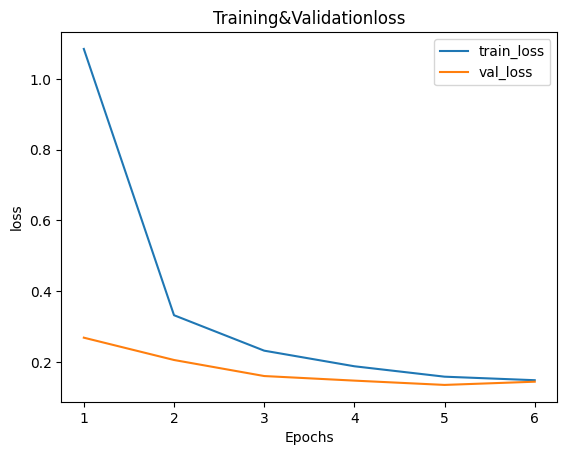

In [38]:
plotData(history_early_stopping, "loss")

In [39]:
model = mnist_model(input_shape)

early_stopping_1 = EarlyStopping(
    monitor = "vall_accuracy",
    patience = 3, #herhangi bir gelisme olms. dahi egitime +3 adim daha devam eder
    min_delta = 0.001, #kabul edebilecegi min. iyilesme orani ->0.001
    mode ="min", #auto
)

history_early_stopping_1 = model.fit(
                                    x = train_images,
                                    y = train_labels,
                                    epochs = 50,
                                    validation_split = 0.2,
                                    batch_size = 64,
                                    verbose = 2,
                                    callbacks = [early_stopping_1]
)


Epoch 1/50
750/750 - 8s - 10ms/step - accuracy: 0.8443 - loss: 0.8890 - val_accuracy: 0.9356 - val_loss: 0.2523
Epoch 2/50


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `vall_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


750/750 - 6s - 8ms/step - accuracy: 0.9256 - loss: 0.2699 - val_accuracy: 0.9591 - val_loss: 0.1588
Epoch 3/50
750/750 - 7s - 9ms/step - accuracy: 0.9450 - loss: 0.1871 - val_accuracy: 0.9647 - val_loss: 0.1380
Epoch 4/50
750/750 - 9s - 12ms/step - accuracy: 0.9545 - loss: 0.1542 - val_accuracy: 0.9682 - val_loss: 0.1275
Epoch 5/50
750/750 - 10s - 13ms/step - accuracy: 0.9587 - loss: 0.1404 - val_accuracy: 0.9683 - val_loss: 0.1296
Epoch 6/50
750/750 - 8s - 11ms/step - accuracy: 0.9644 - loss: 0.1227 - val_accuracy: 0.9704 - val_loss: 0.1169
Epoch 7/50
750/750 - 8s - 11ms/step - accuracy: 0.9668 - loss: 0.1159 - val_accuracy: 0.9722 - val_loss: 0.1256
Epoch 8/50
750/750 - 6s - 9ms/step - accuracy: 0.9689 - loss: 0.1065 - val_accuracy: 0.9738 - val_loss: 0.1232
Epoch 9/50
750/750 - 7s - 9ms/step - accuracy: 0.9690 - loss: 0.1048 - val_accuracy: 0.9737 - val_loss: 0.1250
Epoch 10/50
750/750 - 7s - 9ms/step - accuracy: 0.9702 - loss: 0.1023 - val_accuracy: 0.9719 - val_loss: 0.1459
Epoch 

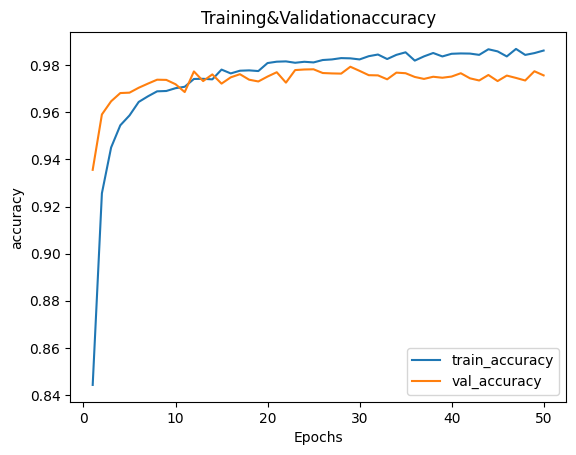

In [40]:
plotData(history_early_stopping_1,"accuracy")

In [41]:
from keras.callbacks import CSVLogger

csv = CSVLogger("logs/result.csv")
model = mnist_model(input_shape)

history_csv_logger = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [csv]
                               )

Epoch 1/20
750/750 - 11s - 15ms/step - accuracy: 0.8089 - loss: 1.3244 - val_accuracy: 0.9274 - val_loss: 0.3206
Epoch 2/20
750/750 - 6s - 8ms/step - accuracy: 0.9002 - loss: 0.3740 - val_accuracy: 0.9538 - val_loss: 0.2044
Epoch 3/20
750/750 - 6s - 9ms/step - accuracy: 0.9285 - loss: 0.2557 - val_accuracy: 0.9622 - val_loss: 0.1602
Epoch 4/20
750/750 - 7s - 9ms/step - accuracy: 0.9455 - loss: 0.1968 - val_accuracy: 0.9684 - val_loss: 0.1355
Epoch 5/20
750/750 - 7s - 9ms/step - accuracy: 0.9514 - loss: 0.1715 - val_accuracy: 0.9656 - val_loss: 0.1518
Epoch 6/20
750/750 - 6s - 8ms/step - accuracy: 0.9588 - loss: 0.1465 - val_accuracy: 0.9675 - val_loss: 0.1500
Epoch 7/20
750/750 - 7s - 9ms/step - accuracy: 0.9600 - loss: 0.1411 - val_accuracy: 0.9680 - val_loss: 0.1395
Epoch 8/20
750/750 - 6s - 8ms/step - accuracy: 0.9621 - loss: 0.1365 - val_accuracy: 0.9677 - val_loss: 0.1467
Epoch 9/20
750/750 - 7s - 9ms/step - accuracy: 0.9662 - loss: 0.1216 - val_accuracy: 0.9663 - val_loss: 0.1470

In [42]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd

pd.read_csv("logs/result.csv", index_col="epoch")

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.808917,1.324433,0.927417,0.320625
1,0.900208,0.374046,0.953750,0.204376
2,0.928521,0.255684,0.962167,0.160234
3,0.945542,0.196797,0.968417,0.135510
4,0.951417,0.171541,0.965583,0.151837
5,0.958771,0.146506,0.967500,0.149974
6,0.959958,0.141084,0.968000,0.139544
7,0.962104,0.136474,0.967667,0.146738
8,0.966208,0.121646,0.966333,0.147045


In [49]:
from keras.callbacks import ModelCheckpoint 
#eigitim dosyalarını belirli adımlarla kaydetmemizi saglar

path = "models/checkpoint.weights.h5"

checkpoint = ModelCheckpoint(
                             filepath = path,
                             save_freq ="epoch", #hangi sıklıkla kaydetmek istiyoruz
                             save_weights_only = True,
                             verbose =1,
                             )

model = mnist_model(input_shape)

history_checkpoint = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 10,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [checkpoint]
                               )

Epoch 1/10


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: saving model to models/checkpoint.weights.h5
750/750 - 9s - 12ms/step - accuracy: 0.8043 - loss: 1.2156 - val_accuracy: 0.9328 - val_loss: 0.3101
Epoch 2/10

Epoch 2: saving model to models/checkpoint.weights.h5
750/750 - 8s - 11ms/step - accuracy: 0.9094 - loss: 0.3397 - val_accuracy: 0.9522 - val_loss: 0.2015
Epoch 3/10

Epoch 3: saving model to models/checkpoint.weights.h5
750/750 - 8s - 11ms/step - accuracy: 0.9361 - loss: 0.2290 - val_accuracy: 0.9632 - val_loss: 0.1591
Epoch 4/10

Epoch 4: saving model to models/checkpoint.weights.h5
750/750 - 8s - 10ms/step - accuracy: 0.9486 - loss: 0.1792 - val_accuracy: 0.9684 - val_loss: 0.1291
Epoch 5/10

Epoch 5: saving model to models/checkpoint.weights.h5
750/750 - 9s - 12ms/step - accuracy: 0.9558 - loss: 0.1540 - val_accuracy: 0.9712 - val_loss: 0.1281
Epoch 6/10

Epoch 6: saving model to models/checkpoint.weights.h5
750/750 - 8s - 11ms/step - accuracy: 0.9631 - loss: 0.1342 - val_accuracy: 0.9642 - val_loss: 0.1443
Epoch 7/1

In [52]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = "val_loss",
                              factor = 0.2,
                              patience = 0,
                              #min_lr = 0.001,
                              verbose = 2
                              )

model = mnist_model(input_shape)

history_reduce_lr = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [reduce_lr]
                               )

Epoch 1/20


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 10s - 14ms/step - accuracy: 0.8444 - loss: 1.0724 - val_accuracy: 0.9356 - val_loss: 0.2707 - learning_rate: 0.0010
Epoch 2/20
750/750 - 8s - 11ms/step - accuracy: 0.9200 - loss: 0.2994 - val_accuracy: 0.9532 - val_loss: 0.1872 - learning_rate: 0.0010
Epoch 3/20
750/750 - 8s - 11ms/step - accuracy: 0.9394 - loss: 0.2123 - val_accuracy: 0.9623 - val_loss: 0.1529 - learning_rate: 0.0010
Epoch 4/20

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
750/750 - 9s - 12ms/step - accuracy: 0.9500 - loss: 0.1752 - val_accuracy: 0.9644 - val_loss: 0.1532 - learning_rate: 0.0010
Epoch 5/20
750/750 - 8s - 11ms/step - accuracy: 0.9694 - loss: 0.0986 - val_accuracy: 0.9741 - val_loss: 0.1106 - learning_rate: 2.0000e-04
Epoch 6/20

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
750/750 - 8s - 11ms/step - accuracy: 0.9758 - loss: 0.0747 - val_accuracy: 0.9748 - val_loss: 0.1119 - learning_rate: 2.0000e-04
Epoch 7/20
750/750 - 8s - 11ms

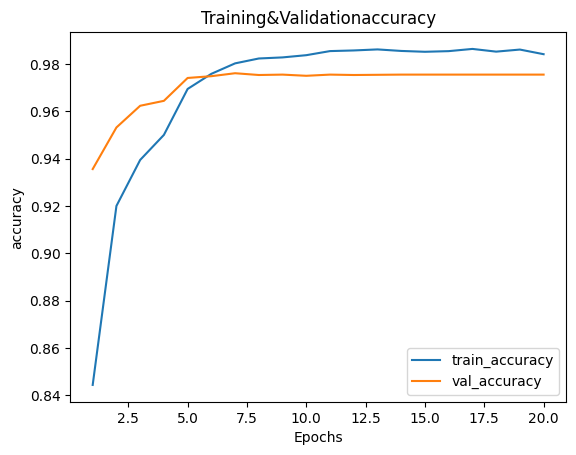

In [61]:
#plotLR(history_reduce_lr)
plotData(history_reduce_lr, "accuracy")

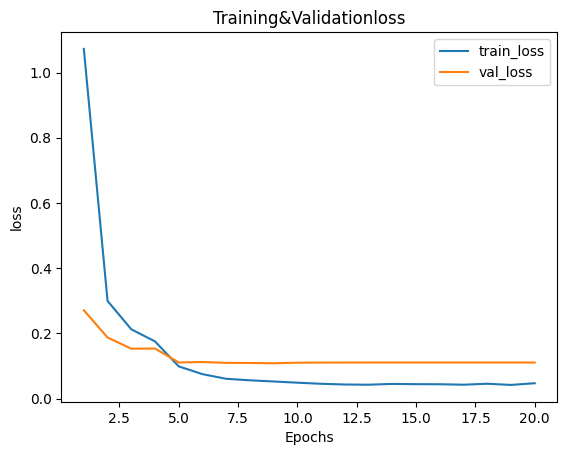

In [53]:
plotData(history_reduce_lr,"loss")

In [70]:
import numpy as np
from keras.callbacks import LearningRateScheduler
#calisma esnasında sürekli lr'i gunceller
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * np.exp(-0.1))  # numpy kullanarak float'a dönüştürüyoruz #return lr * tf.exp(-0.1)
    
model = mnist_model(input_shape)

history_lr_scheduler = model.fit(
                               x = train_images,
                               y = train_labels,
                               epochs = 20,
                               validation_split = 0.20,
                               batch_size = 64,
                               verbose = 2,
                               callbacks = [LearningRateScheduler(scheduler, verbose=1)]
                               )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20


/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 10s - 13ms/step - accuracy: 0.8479 - loss: 0.9202 - val_accuracy: 0.9376 - val_loss: 0.2410 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
750/750 - 8s - 11ms/step - accuracy: 0.9249 - loss: 0.2721 - val_accuracy: 0.9561 - val_loss: 0.1663 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
750/750 - 8s - 11ms/step - accuracy: 0.9452 - loss: 0.1939 - val_accuracy: 0.9614 - val_loss: 0.1463 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
750/750 - 10s - 13ms/step - accuracy: 0.9540 - loss: 0.1581 - val_accuracy: 0.9655 - val_loss: 0.1414 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
750/750 - 9s - 12ms/step - accuracy: 0.9601 - loss: 0.1338 - val_accuracy: 0.9707 - val_loss: 0.1379 - learning_rate: 0.0010

Epoch 6:

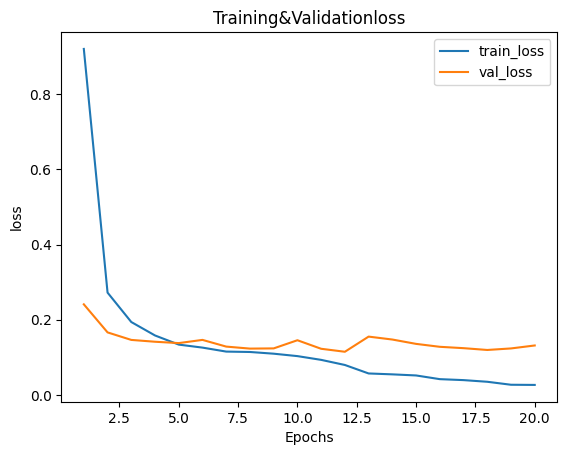

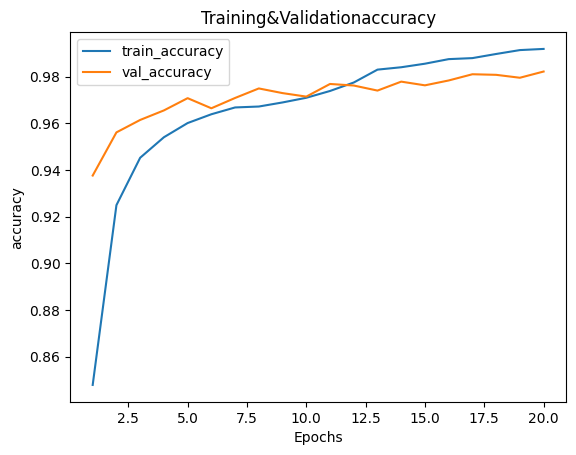

In [72]:
#plotLR(history_lr_scheduler)
plotData(history_lr_scheduler,"loss")
plotData(history_lr_scheduler,"accuracy")